# COVID-19 Forecasting for India using ARIMA
This notebook forecasts confirmed cases and deaths in India for the next 30 days using ARIMA models.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

### Load Datasets

In [16]:
# Load datasets (ensure these files are in the same directory as this notebook)
confirmed_df = pd.read_csv("time_series_covid19_confirmed_global.csv")
deaths_df = pd.read_csv("time_series_covid19_deaths_global.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'time_series_covid19_confirmed_global.csv'

### Prepare India's Time Series Data

In [ ]:
# Prepare India's confirmed cases
india_confirmed = confirmed_df[confirmed_df["Country/Region"] == "India"].drop(columns=["Province/State", "Country/Region", "Lat", "Long"])
india_confirmed = india_confirmed.sum().reset_index()
india_confirmed.columns = ["ds", "y"]
india_confirmed["ds"] = pd.to_datetime(india_confirmed["ds"])
india_confirmed["y"] = india_confirmed["y"].astype(int)
india_confirmed_ts = india_confirmed.set_index("ds")["y"]

# Prepare India's deaths
india_deaths = deaths_df[deaths_df["Country/Region"] == "India"].drop(columns=["Province/State", "Country/Region", "Lat", "Long"])
india_deaths = india_deaths.sum().reset_index()
india_deaths.columns = ["ds", "y"]
india_deaths["ds"] = pd.to_datetime(india_deaths["ds"])
india_deaths["y"] = india_deaths["y"].astype(int)
india_deaths_ts = india_deaths.set_index("ds")["y"]

### Train ARIMA Models and Forecast 30 Days

In [ ]:
# Train ARIMA model for confirmed cases
confirmed_model = ARIMA(india_confirmed_ts, order=(2, 2, 2))
confirmed_result = confirmed_model.fit()
confirmed_forecast = confirmed_result.forecast(steps=30)

# Train ARIMA model for deaths
deaths_model = ARIMA(india_deaths_ts, order=(2, 2, 2))
deaths_result = deaths_model.fit()
deaths_forecast = deaths_result.forecast(steps=30)

# Forecast dates
forecast_dates = pd.date_range(start=india_confirmed_ts.index[-1] + pd.Timedelta(days=1), periods=30)

### Visualize Forecasts

NameError: name 'india_confirmed_ts' is not defined

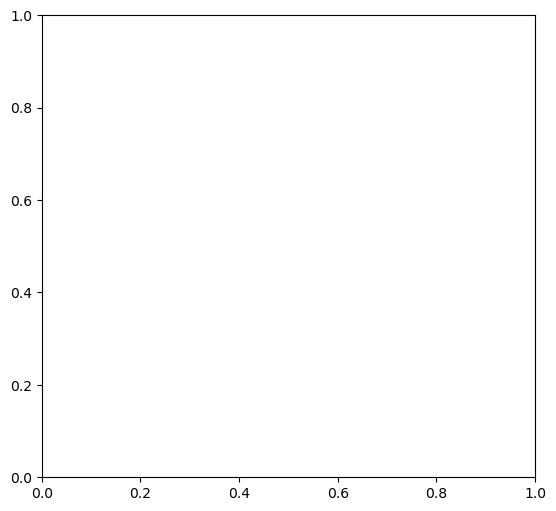

In [20]:
plt.figure(figsize=(14, 6))

# Confirmed cases
plt.subplot(1, 2, 1)
plt.plot(india_confirmed_ts, label="Historical Confirmed")
plt.plot(forecast_dates, confirmed_forecast, color="red", label="Forecast")
plt.title("India COVID-19 Confirmed Cases Forecast (30 Days)")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()

# Deaths
plt.subplot(1, 2, 2)
plt.plot(india_deaths_ts, label="Historical Deaths")
plt.plot(forecast_dates, deaths_forecast, color="red", label="Forecast")
plt.title("India COVID-19 Deaths Forecast (30 Days)")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
# Print forecasted values
print("\nForecasted Confirmed Cases (last 10 days):")
print(confirmed_forecast.tail(10))

print("\nForecasted Deaths (last 10 days):")
print(deaths_forecast.tail(10))


Forecasted Confirmed Cases (last 10 days):


NameError: name 'confirmed_forecast' is not defined